----------
**Diabetes - EDA & Prediction (0.906)**
=====================================

* **Accuracy - 5 Folds - LightGBM : 89.8%**
* **Accuracy - 5 Folds - LightGBM & KNN : 90.6%**


***Vincent Lugat***

*December 2023*

----------

![](http://image.noelshack.com/fichiers/2019/06/1/1549295827-0-0000.png)

Greetings!

Welcome to this comprehensive notebook, your ultimate guide for a holistic journey through machine learning. This tutorial covers a myriad of essential concepts, ensuring you gain a thorough understanding of the entire process. Here's a breakdown of the key topics:

1. **Handling Missing Values (Vital Step):**
   Learn crucial techniques to effectively address and complete missing data, a fundamental aspect of data preprocessing.

2. **Exploratory Data Analysis (EDA):**
   Delve into the world of EDA to uncover meaningful insights from your data, providing a solid foundation for subsequent steps.

3. **Feature Engineering:**
   Discover the art of creating new features strategically, enhancing your model's accuracy and predictive power.

4. **Feature Encoding:**
   Master the techniques of encoding features, a pivotal step in preparing your data for machine learning algorithms.

5. **Utilizing LightGBM and Hyperparameter Optimization:**
   Dive into the implementation of LightGBM, a powerful gradient boosting framework, and fine-tune its performance through hyperparameter optimization.

6. **Incorporating KNN into LightGBM for Enhanced Accuracy:**
   Explore the synergy of combining a K-Nearest Neighbors (KNN) classifier with LightGBM, a potent strategy to achieve accuracy surpassing the 90% mark.

Embark on this enriching journey that promises a holistic understanding of machine learning, from data preprocessing to advanced model optimization. Get ready to elevate your skills and knowledge to new heights!

Happy learning!

**Loading the libraries**

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pyo.init_notebook_mode(connected=True)
import squarify

# df processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

**Loading dataset with pandas (pd)**

In [2]:
df = pd.read_csv('diabetes.csv')

**Checking data head and info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# *What is Diabetes?*

**Diabetes** is a health condition where the level of sugar (glucose) in your blood is too high. The energy your body needs comes from glucose, which is derived from the food you eat. Insulin, a hormone produced by the pancreas, helps the cells in your body use glucose for energy. In diabetes, either the body doesn't make enough insulin, or it doesn't use it effectively, causing glucose to accumulate in the blood instead of reaching the cells.

Over time, elevated blood glucose levels can lead to health issues. While diabetes doesn't have a cure, it can be managed with proper steps to keep you healthy.

Some people may refer to diabetes as "a touch of sugar" or "borderline diabetes," implying a less serious condition. However, it's important to note that every case of diabetes is significant.

**Types of Diabetes:**

1. **Type 1 Diabetes:**
   - In this type, the body doesn't produce insulin because the immune system attacks and destroys the insulin-producing cells in the pancreas.
   - Typically diagnosed in children and young adults.
   - Daily insulin injections are essential for managing type 1 diabetes.

2. **Type 2 Diabetes:**
   - In type 2 diabetes, the body doesn't make or use insulin effectively.
   - Can develop at any age, including childhood, but is more common in middle-aged and older individuals.
   - This is the most prevalent type of diabetes.

3. **Gestational Diabetes:**
   - Occurs in some pregnant women and often resolves after childbirth.
   - Women who've had gestational diabetes are at a higher risk of developing type 2 diabetes later in life.

4. **Other Types:**
   - Less common types include monogenic diabetes (inherited form) and cystic fibrosis-related diabetes.

Understanding these basic concepts is crucial for effectively managing and addressing diabetes.

What's target's distribution ? 

In [5]:
# 2 dfsets
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]


In [6]:
import plotly.graph_objs as go
import plotly.offline as pyo

def plot_target_count(df):
    outcome_counts = df['Outcome'].value_counts()

    trace = go.Bar(
        x=outcome_counts.values.tolist(),
        y=['healthy', 'diabetic'],
        orientation='h',
        text=outcome_counts.values.tolist(),
        textfont=dict(size=15),
        textposition='auto',
        opacity=0.8,
        marker=dict(
            color=['#3887BE', '#52D3D8'],
            line=dict(color='#000000', width=1.5)
        )
    )

    layout = go.Layout(title='Count of Outcome variable')

    fig = go.Figure(data=[trace], layout=layout)

    pyo.iplot(fig)



In [7]:
def plot_target_percentage(df):
    outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100

    trace = go.Pie(
        labels=outcome_percentages.index,
        values=outcome_percentages.values,
        textfont=dict(size=15),
        opacity=0.8,
        marker=dict(
            colors=['#FB8B24', '#9A031E'],
            line=dict(color='#000000', width=1.5)
        )
    )

    layout = go.Layout(title='Distribution of Outcome variable')

    fig = go.Figure(data=[trace], layout=layout)

    pyo.iplot(fig)



In [8]:


plot_target_count(df)


In [9]:

plot_target_percentage(df)


The above graph shows that the data is unbalanced. The number of non-diabetic is 268 the number of diabetic patients is 500

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value
Below we replace 0 value by NaN :

Now, we can look at where are missing values : 

In [11]:
def missing_plot(dfset, key):
    null_feat = pd.DataFrame(len(dfset[key]) - dfset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dfset[key]) - (len(dfset[key]) - dfset.isnull().sum())) / len(dfset[key]) * 100,
                                   columns=['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(
        x=null_feat.index,
        y=null_feat['Count'],
        opacity=0.8,
        text=percentage_null['Count'],
        textposition='auto',
        marker=dict(color='#8ACDD7', line=dict(color='#000000', width=1.5))
    )

    layout = dict(title="Missing Values (count & %)")

    fig = go.Figure(data=[trace], layout=layout)
    pyo.iplot(fig)
missing_plot(df, 'Outcome')


Missing values : 
* Insulin = 48.7% - 374
* SkinThickness = 29.56% - 227
* BloodPressure = 4.56% - 35
* BMI = 1.43% - 11
* Glucose = 0.65% - 5

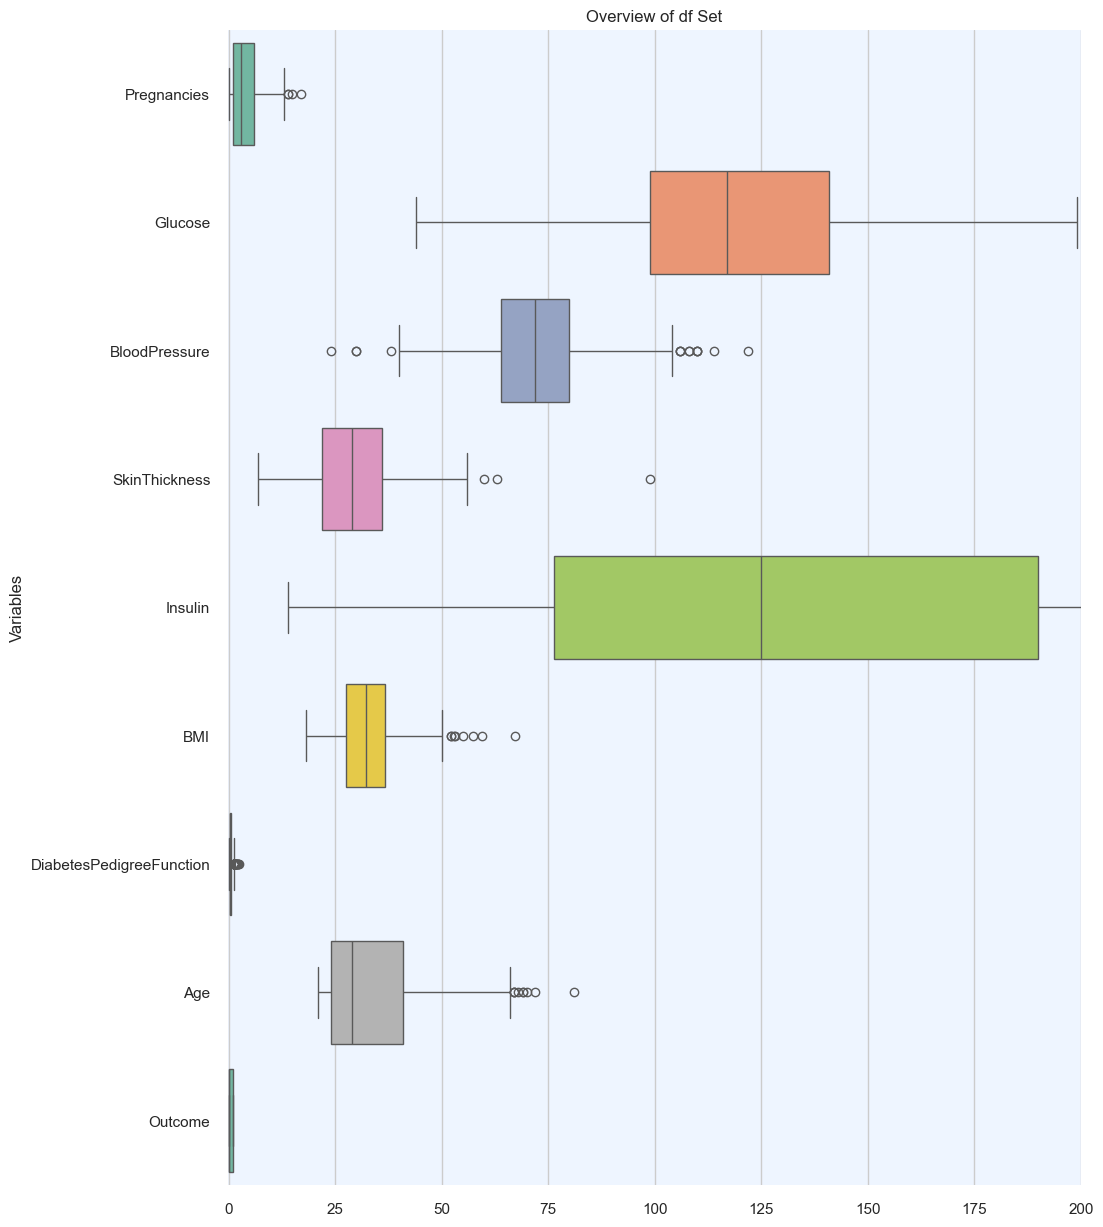

In [12]:

sns.set(style="whitegrid")
plt.figure(figsize=(11, 15))
ax = plt.gca()
ax.set_facecolor('#EEF5FF')
ax.set(xlim=(-.05, 200), ylabel='Variables', title="Overview of df Set")
sns.boxplot(data=df, orient='h', palette='Set2', ax=ax)
sns.despine(left=True, bottom=True)
ax.xaxis.grid(True)
plt.show()


OK, all missing values are encoded with NaN value

**To fill these Nan values the data distribution needs to be understood against the target**. 

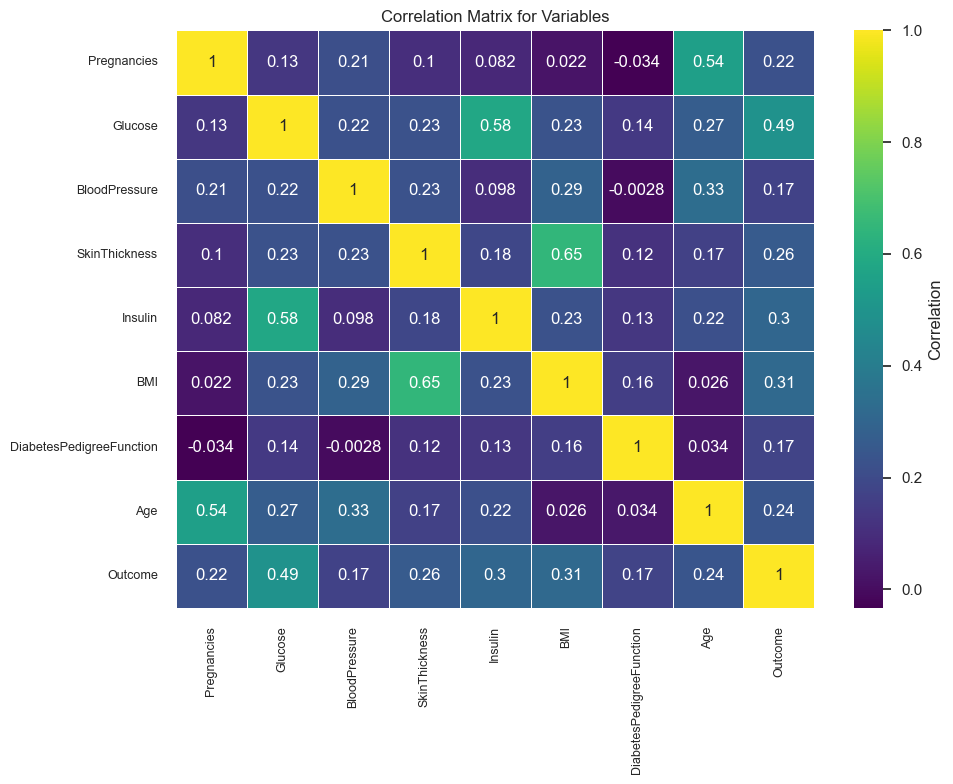

In [13]:
correlation = df.corr()
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis', cbar_kws={'label': 'Correlation'}, linewidths=.5)
plt.title('Correlation Matrix for Variables')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

To replace missing values, we'll use median by target (Outcome)

In [14]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

* **Insulin** : 2-Hour serum insulin (mu U/ml)

In [15]:
def plot_distribution(data_select, size_bin):
    diabetic_data = D[data_select]
    healthy_data = H[data_select]

    hist_data = [diabetic_data, healthy_data]
    group_labels = ['Diabetic', 'Healthy']
    colors = ['#974EC3', '#33BBC5']
    fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True, bin_size=size_bin, curve_type='kde')
    fig['layout'].update(title=f'Distribution of {data_select} in Diabetic and Healthy Groups',
                         xaxis=dict(title=data_select),
                         yaxis=dict(title='Density'))
    pyo.iplot(fig, filename='Density Plot')


In [16]:

# Example usage
plot_distribution('Insulin', 0)


In [17]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

In [18]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

* **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

In [19]:
plot_distribution('Glucose', 0)

In [20]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [21]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

107 for a healthy person and 140 for a diabetic person

- **SkinThickness** : Triceps skin fold thickness (mm)

In [22]:
plot_distribution('SkinThickness', 10)

In [23]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [24]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

27 for a healthy person and 32 for a diabetic person

* **BloodPressure** : Diastolic blood pressure (mm Hg)

In [25]:
plot_distribution('BloodPressure', 5)

In [26]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

* **BMI** : Body mass index (weight in kg/(height in m)^2)

In [28]:
plot_distribution('BMI', 0)

In [29]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [30]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

* **Age** : Age (years)
* **DiabetesPedigreeFunction** : Diabetes pedigree function
* **Pregnancies** : Number of times pregnant

In [31]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [32]:
missing_plot(df, 'Outcome')

All features are complete ! 
Now, we can create new features

# New features (16) & EDA
Here, we define 3 plots functions 

In [33]:
def plot_feat1_feat2(feat1, feat2):
    diabetic_data = df[df['Outcome'] != 0]
    healthy_data = df[df['Outcome'] == 0]
    trace0 = go.Scatter(
        x=diabetic_data[feat1],
        y=diabetic_data[feat2],
        name='Diabetic',
        mode='markers',
        marker=dict(color='#7209b7', line=dict(width=1))
    )
    trace1 = go.Scatter(
        x=healthy_data[feat1],
        y=healthy_data[feat2],
        name='Healthy',
        mode='markers',
        marker=dict(color='#4cc9f0', line=dict(width=1))
    )
    layout = go.Layout(
        title=f'{feat1} vs {feat2}',
        yaxis=dict(title=feat2, zeroline=False),
        xaxis=dict(title=feat1, zeroline=False)
    )
    plots = [trace0, trace1]
    fig = go.Figure(data=plots, layout=layout)
    pyo.iplot(fig)

In [34]:
def barplot(var_select, sub):
    diabetic_data = df[df['Outcome'] != 0]
    healthy_data = df[df['Outcome'] == 0]
    count_diabetic = diabetic_data[var_select].value_counts()
    percent_diabetic = (count_diabetic / (count_diabetic + healthy_data[var_select].value_counts())) * 100
    trace1 = go.Bar(
        x=count_diabetic.index,
        y=count_diabetic.values,
        text=count_diabetic.values,
        textposition='auto',
        name='Diabetic',
        opacity=0.8,
        marker=dict(color='#d62828', line=dict(color='#000000', width=1))
    )
    trace2 = go.Bar(
        x=healthy_data[var_select].value_counts().index,
        y=healthy_data[var_select].value_counts().values,
        text=healthy_data[var_select].value_counts().values,
        textposition='auto',
        name='Healthy',
        opacity=0.8,
        marker=dict(color='#fcbf49', line=dict(color='#000000', width=1))
    )
    trace3 = go.Scatter(
        x=percent_diabetic.index,
        y=percent_diabetic.values,
        yaxis='y2',
        name='% Diabetic',
        opacity=0.6,
        marker=dict(color='black', line=dict(color='#000000', width=0.5))
    )
    layout = dict(
        title=f'{var_select} ({sub})',
        xaxis=dict(title=var_select),
        yaxis=dict(title='Count'),
        yaxis2=dict(
            range=[-5, 105],
            overlaying='y',
            anchor='x',
            side='right',
            zeroline=False,
            showgrid=False,
            title='% Diabetic'
        )
    )
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    pyo.iplot(fig)


In [35]:
def plot_pie(var_select, sub):
    diabetic_data = df[df['Outcome'] != 0]
    healthy_data = df[df['Outcome'] == 0]

    col = ['#f72585', '#b5179e', '#7209b7', '#560bad', '#480ca8', '#3a0ca3', '#3f37c9', '#4361ee']
    trace1 = go.Pie(
        values=diabetic_data[var_select].value_counts().values.tolist(),
        labels=diabetic_data[var_select].value_counts().keys().tolist(),
        textfont=dict(size=15),
        opacity=0.8,
        hole=0.5,
        hoverinfo="label+percent+name",
        domain=dict(x=[.0, .48]),
        name="Diabetic",
        marker=dict(colors=col, line=dict(width=1.5))
    )
    trace2 = go.Pie(
        values=healthy_data[var_select].value_counts().values.tolist(),
        labels=healthy_data[var_select].value_counts().keys().tolist(),
        textfont=dict(size=15),
        opacity=0.8,
        hole=0.5,
        hoverinfo="label+percent+name",
        marker=dict(line=dict(width=1.5)),
        domain=dict(x=[.52, 1]),
        name="Healthy"
    )
    annotations = [
        dict(text=f"Diabetic : {len(diabetic_data)}", font=dict(size=13), showarrow=False, x=0.22, y=-0.1),
        dict(text=f"Healthy : {len(healthy_data)}", font=dict(size=13), showarrow=False, x=0.8, y=-0.1)
    ]
    layout = go.Layout(
        title=f'{var_select} Distribution by Target <br>{sub}',
        annotations=annotations
    )
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    pyo.iplot(fig)


* **Glucose and Age**

In [36]:
plot_feat1_feat2('Glucose','Age')

Healthy persons are concentrate with an age <= 30 and glucose <= 120

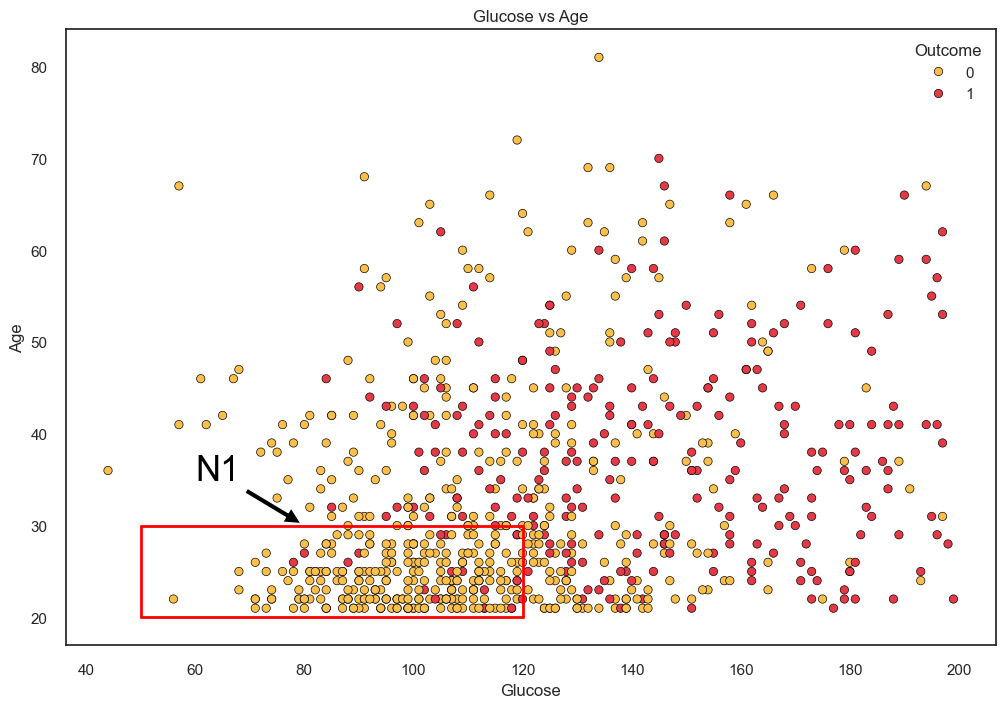

In [37]:
palette = {0: '#fcbf49', 1: '#e63946'}
edgecolor = 'black'

fig = plt.figure(figsize=(12, 8))

ax1 = sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=df, palette=palette, edgecolor=edgecolor)

plt.annotate('N1', size=25, color='black', xy=(80, 30), xytext=(60, 35),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.plot([50, 120], [30, 30], linewidth=2, color='red')
plt.plot([120, 120], [20, 30], linewidth=2, color='red')
plt.plot([50, 120], [20, 20], linewidth=2, color='red')
plt.plot([50, 50], [20, 30], linewidth=2, color='red')
plt.title('Glucose vs Age')
plt.show()


In [38]:
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1

In [39]:
barplot('N1', ':Glucose <= 120 and Age <= 30')

In [40]:
plot_pie('N1', '(Glucose <= 120 and Age <= 30)')

* **BMI**

According to wikipedia "The body mass index (BMI) or Quetelet index is a value derived from the mass (weight) and height of an individual. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres."

30 kg/m² is the limit to obesity

In [41]:
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1

In [42]:
barplot('N2', ': BMI <= 30')

In [43]:
plot_pie('N2', 'BMI <= 30')

* **Pregnancies and Age**

In [44]:
plot_feat1_feat2('Pregnancies','Age')

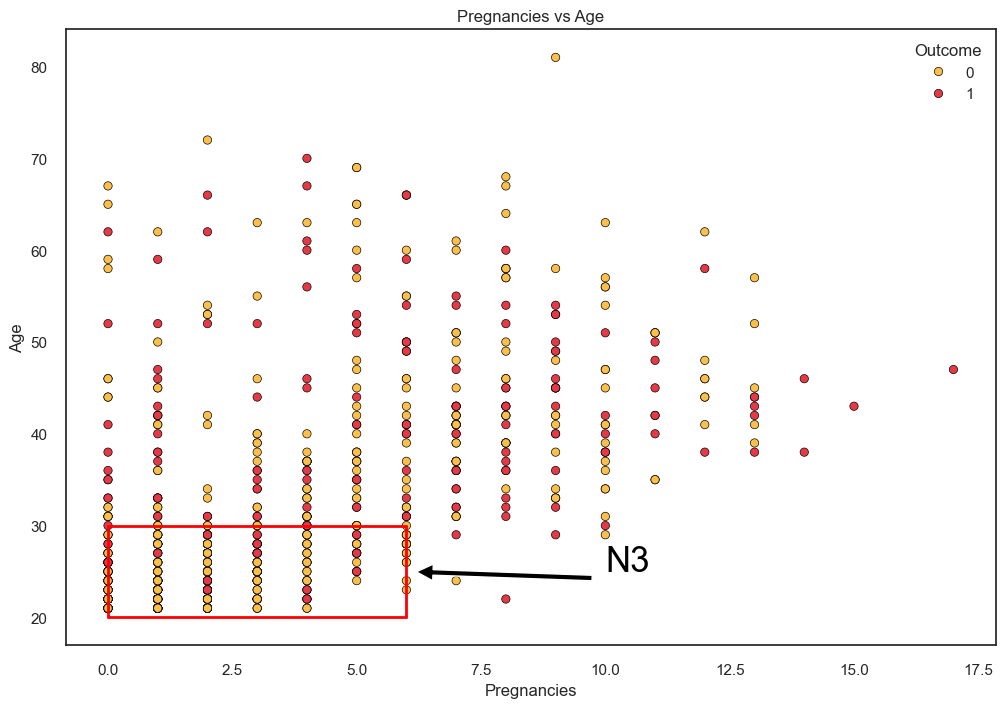

In [45]:
palette = {0: '#fcbf49', 1: '#e63946'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Pregnancies'], y = df['Age'], hue = "Outcome",data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N3', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 6], [30, 30], linewidth=2, color = 'red')
plt.plot([6, 6], [20, 30], linewidth=2, color = 'red')
plt.plot([0, 6], [20, 20], linewidth=2, color = 'red')
plt.plot([0, 0], [20, 30], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()


In [46]:
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1

In [47]:
barplot('N3', ': Age <= 30 and Pregnancies <= 6')

In [48]:
plot_pie('N3', 'Age <= 30 and Pregnancies <= 6')

* **Glucose and BloodPressure**

In [49]:
plot_feat1_feat2('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

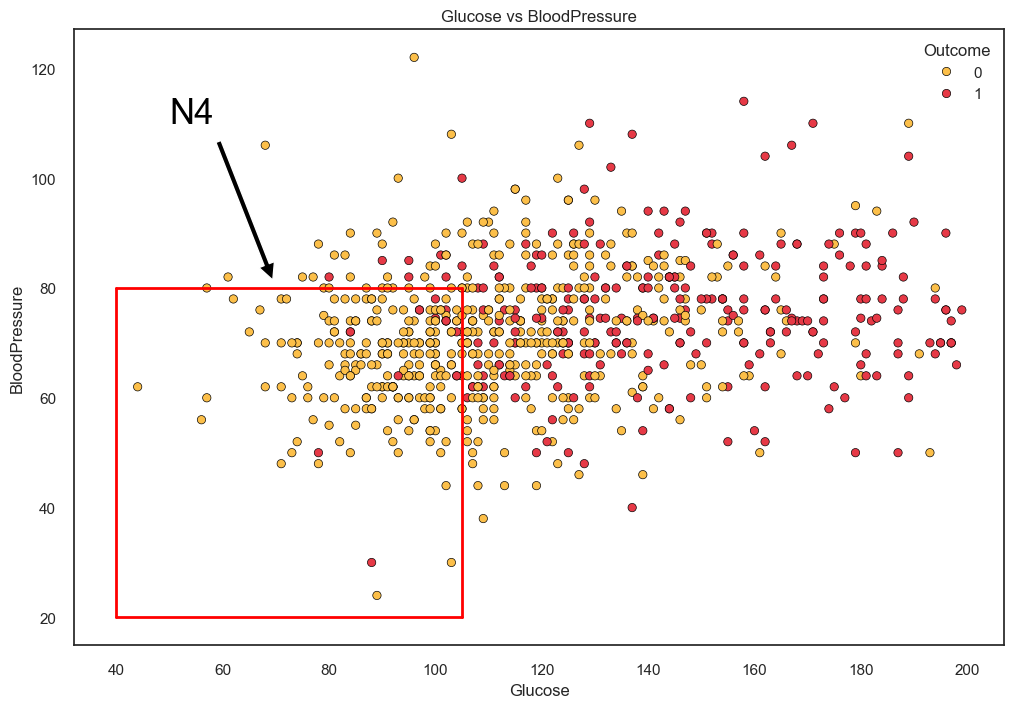

In [50]:
palette = {0: '#fcbf49', 1: '#e63946'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BloodPressure'], hue = "Outcome",data=df, palette = palette, edgecolor=edgecolor)

plt.annotate('N4', size=25, color='black', xy=(70, 80), xytext=(50, 110),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([40, 105], [80, 80], linewidth=2, color = 'red')
plt.plot([40, 40], [20, 80], linewidth=2, color = 'red')
plt.plot([40, 105], [20, 20], linewidth=2, color = 'red')
plt.plot([105, 105], [20, 80], linewidth=2, color = 'red')
plt.title('Glucose vs BloodPressure')
plt.show()

In [51]:
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1

In [52]:
barplot('N4', ': Glucose <= 105 and BloodPressure <= 80')

In [53]:
plot_pie('N4', 'Glucose <= 105 and BloodPressure <= 80')

* **SkinThickness**

In [54]:
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1

In [55]:
barplot('N5', ':SkinThickness <= 20')

In [56]:
plot_pie('N5', 'SkinThickness <= 20')

* **SkinThickness and BMI**

In [57]:
plot_feat1_feat2('SkinThickness','BMI')

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

In [58]:
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1

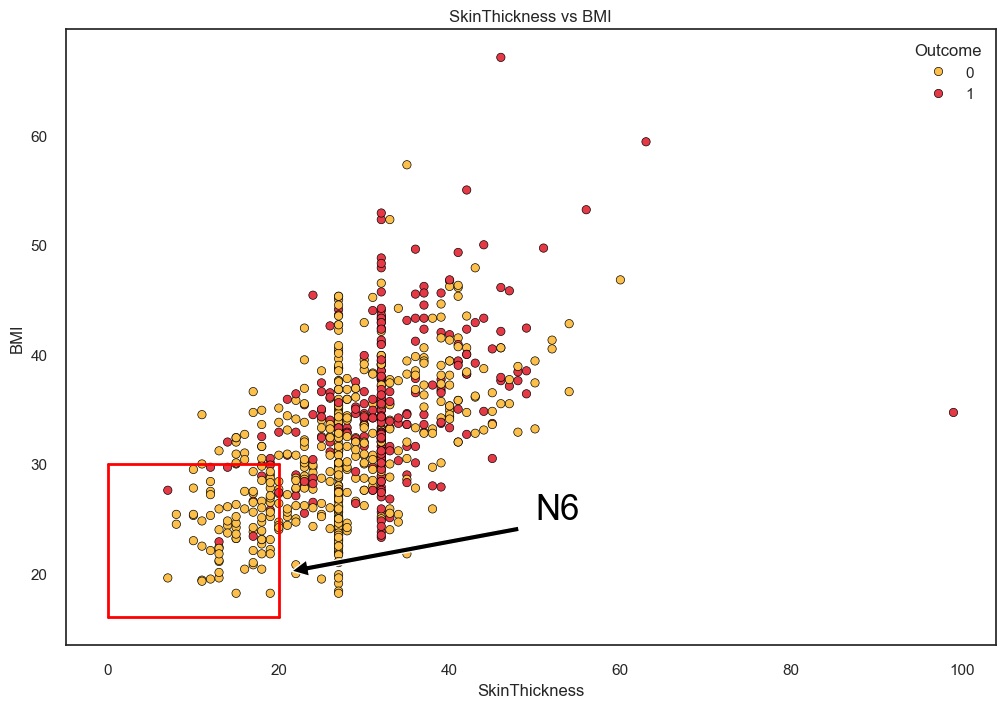

In [59]:
palette = {0: '#fcbf49', 1: '#e63946'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['SkinThickness'], y = df['BMI'], hue = "Outcome",data = df, palette = palette, edgecolor=edgecolor)

plt.annotate('N6', size=25, color='black', xy=(20, 20), xytext=(50, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([0, 20], [30, 30], linewidth=2, color = 'red')
plt.plot([0, 0], [16, 30], linewidth=2, color = 'red')
plt.plot([0, 20], [16, 16], linewidth=2, color = 'red')
plt.plot([20, 20], [16, 30], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

In [60]:
barplot('N6', ': BMI < 30 and SkinThickness <= 20')

In [61]:
plot_pie('N6', 'BMI < 30 and SkinThickness <= 20')

* **Glucose and BMI**

In [62]:
plot_feat1_feat2('Glucose','BMI')

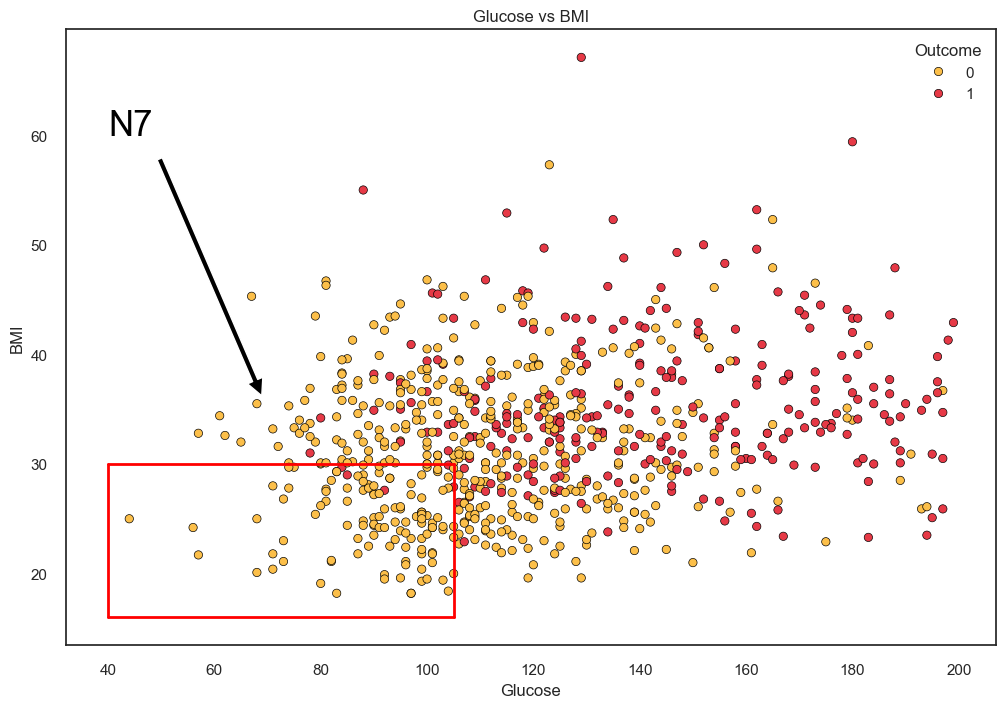

In [63]:
palette = {0: '#fcbf49', 1: '#e63946'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['Glucose'], y = df['BMI'], hue = "Outcome",data= df, palette = palette, edgecolor=edgecolor)

plt.annotate('N7', size=25, color='black', xy=(70, 35), xytext=(40, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([105, 105], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 40], [16, 30], linewidth=2, color = 'red')
plt.plot([40, 105], [16, 16], linewidth=2, color = 'red')
plt.plot([40, 105], [30, 30], linewidth=2, color = 'red')
plt.title('Glucose vs BMI')
plt.show()

In [64]:
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1

In [65]:
barplot('N7', ': Glucose <= 105 and BMI <= 30')

In [66]:
plot_pie('N7', 'Glucose <= 105 and BMI <= 30')

* **Insulin**

In [67]:
plot_distribution('Insulin', 0)

In [68]:
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1

In [69]:
barplot('N9', ': Insulin < 200')

In [70]:
plot_pie('N9', 'Insulin < 200')

* **BloodPressure**

In [71]:
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1

In [72]:
barplot('N10', ': BloodPressure < 80')

In [73]:
plot_pie('N10', 'BloodPressure < 80')

* **Pregnancies**

In [74]:
plot_distribution('Pregnancies', 0)

In [75]:
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1

In [76]:
barplot('N11', ': Pregnancies > 0 and < 4')

In [77]:
plot_pie('N11', 'Pregnancies > 0 and < 4')

* **Others**

In [78]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']


In [79]:
D = df[(df['Outcome'] != 0)]
H = df[(df['Outcome'] == 0)]

In [80]:
plot_distribution('N0', 0)

In [81]:
df.loc[:,'N15']=0
df.loc[(df['N0']<1034) ,'N15']=1

In [82]:
barplot('N15', ': N0 < 1034')

In [83]:
plot_pie('N15', 'N0 < 1034')

# StandardScaler and LabelEncoder

* **StandardScaler**:-

Standardize features by removing the mean and scaling to unit variance : 

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the set. Mean and standard deviation are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

* **LabelEncoder**:- Encode labels with value between 0 and n_classes-1.

Bellow we encode the data to feed properly to our algorithm

In [84]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
target_col = ["Outcome"]
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [col for col in cat_cols if col not in bin_cols]
le = LabelEncoder()
df[bin_cols] = df[bin_cols].apply(lambda col: le.fit_transform(col))
df = pd.get_dummies(df, columns=multi_cols)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df = df.drop(columns=num_cols, axis=1).join(df[num_cols])
df_og = df.copy()


Now, we can compute correlation matrix 

## Correlation Matrix

A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

In [85]:
from plotly.subplots import make_subplots
def correlation_plot(df):
    correlation = df.corr()
    fig = make_subplots(rows=1, cols=1)
    heatmap = px.imshow(correlation,
                        labels=dict(color="Correlation"),
                        color_continuous_scale='thermal',
                        x=correlation.columns,
                        y=correlation.columns,
                        )
    trace = heatmap['data'][0]
    fig.add_trace(trace, row=1, col=1)
    fig.update_layout(title='Correlation Matrix for variables',
                      margin=dict(r=0, l=100, t=0, b=100),
                      yaxis=dict(tickfont=dict(size=9)),
                      xaxis=dict(tickfont=dict(size=9)),
                      height=1000, width=1000  
                      )

    fig.show()


In [86]:
correlation_plot(df)


## X & Y

Now we will define ***X*** and ***Y***

In [87]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Model Performance Overview

Evaluating the performance of a model involves various components:

### Confusion Matrix:-
A confusion matrix helps visualize how well an algorithm is performing:

- **True Positive (TP):-** Diabetic correctly identified as diabetic.
- **True Negative (TN):-** Healthy correctly identified as healthy.
- **False Positive (FP):-** Healthy incorrectly identified as diabetic.
- **False Negative (FN):-** Diabetic incorrectly identified as healthy.

### Metrics:-
Key metrics to assess model performance:

- **Accuracy:-** (TP + TN) / (TP + TN + FP + FN)
- **Precision:-** TP / (TP + FP)
- **Recall:-** TP / (TP + FN)
- **F1 Score:-** 2 x ((Precision x Recall) / (Precision + Recall))

### ROC Curve:-
The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold settings.

### Precision-Recall Curve:-
Illustrates the tradeoff between precision and recall for different thresholds.

### Cross-Validation (K-Fold):-
In K-Fold cross-validation, the dataset is divided into k equal-sized subsets. The model is trained and tested k times, each time using a different subset for validation and the rest for training. This process ensures that all observations are used for both training and validation.

These evaluation tools provide a comprehensive understanding of a model's performance, aiding in effective model selection and optimization.

In [88]:
def model_performance(model, subtitle):
    # Kfold
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 1

    for train, test in cv.split(X, y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:, 1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:, 1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)
    trace1 = go.Heatmap(z=conf_matrix, x=["0 (pred)", "1 (pred)"],
                       y=["0 (true)", "1 (true)"], xgap=2, ygap=2,
                       colorscale='Viridis', showscale=False)

    # Show metrics
    tp = conf_matrix[1, 1]
    fn = conf_matrix[1, 0]
    fp = conf_matrix[0, 1]
    tn = conf_matrix[0, 0]
    accuracy = ((tp + tn) / (tp + tn + fp + fn))
    precision = (tp / (tp + fp))
    recall = (tp / (tp + fn))
    f1_score = (2 * (((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn)))))

    # Metrics bar plot
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x=np.round_([accuracy, precision, recall, f1_score], 4),
                    y=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                    text=np.round_([accuracy, precision, recall, f1_score], 4),
                    textposition='auto', textfont=dict(color='black'),
                    orientation='h', opacity=1, marker=dict(
            color=colors,
            line=dict(color='#000000', width=1.5)))

    # ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)

    trace3 = go.Scatter(x=mean_fpr, y=mean_tpr,
                       name="ROC Curve",
                       line=dict(color=('rgb(22, 96, 167)'), width=2), fill='tozeroy')

    # Precision - recall curve
    y_real = y
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    trace4 = go.Scatter(x=recall, y=precision,
                       name="Precision" + str(precision),
                       line=dict(color=('lightcoral'), width=2), fill='tozeroy')

    mean_auc = round(mean_auc, 3)
    # Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                            specs=[[{}, {}],
                                   [{}, {}]],
                            subplot_titles=('Confusion Matrix',
                                            'Metrics',
                                            'ROC curve' + '(' + str(mean_auc) + ')',
                                            'Precision - Recall curve',
                                            ))
    # Trace and layout
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 2, 1)
    fig.append_trace(trace4, 2, 2)

    fig['layout'].update(showlegend=False, title='<b>Model performance report (5 folds)</b><br>' + subtitle,
                        autosize=False, height=830, width=830,
                        plot_bgcolor='black',
                        paper_bgcolor='black',
                        margin=dict(b=195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color='white')
    fig["layout"]["yaxis1"].update(color='white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color='white')))
    fig["layout"]["yaxis2"].update(color='white')
    fig["layout"]["xaxis3"].update(dict(title="false positive rate"), color='white')
    fig["layout"]["yaxis3"].update(dict(title="true positive rate"), color='white')
    fig["layout"]["xaxis4"].update(dict(title="recall"), range=[0, 1.05], color='white')
    fig["layout"]["yaxis4"].update(dict(title="precision"), range=[0, 1.05], color='white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size=14)
    pyo.iplot(fig)



## Score Tables 
- We can complete model performance report with a table contain all results by fold

In [89]:
def scores_table(model, subtitle):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    res = []
    for sc in scores:
        scores = cross_val_score(model, X, y, cv=5, scoring=sc)
        res.append(scores)
    df = pd.DataFrame(res).T
    df.loc['mean'] = df.mean()
    df.loc['std'] = df.std()
    df = df.rename(columns={0: 'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1 Score', 4: 'ROC AUC'})

    trace = go.Table(
        header=dict(values=['<b>Fold', '<b>Accuracy', '<b>Precision', '<b>Recall', '<b>F1 Score', '<b>ROC AUC'],
                    line=dict(color='#7D7F80'),
                    fill=dict(color='#a1c3d1'),
                    align=['center'],
                    font=dict(size=15)),
        cells=dict(values=[('1', '2', '3', '4', '5', 'mean', 'std'),
                           np.round(df['Accuracy'], 3),
                           np.round(df['Precision'], 3),
                           np.round(df['Recall'], 3),
                           np.round(df['F1 Score'], 3),
                           np.round(df['ROC AUC'], 3)],
                   line=dict(color='#7D7F80'),
                   fill=dict(color='#EDFAFF'),
                   align=['center'], font=dict(size=15)))

    layout = dict(width=800, height=400, title='<b>Cross Validation - 5 Folds</b><br>' + subtitle,
                  font=dict(size=15))
    fig = dict(data=[trace], layout=layout)

    pyo.iplot(fig, filename='styled_table')


## Machine Learning (RandomSearch + LightGBM - Accuracy = 89.5%)

**LightGBM** is a gradient boosting framework that utilizes tree-based learning algorithms. It is designed to be efficient, distributed, and offers several advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support for parallel and GPU learning.
- Capability to handle large-scale data.

To find the best hyperparameters, we'll use Random Search CV. Random search is a technique where random combinations of hyperparameters are used to find the best solution for the built model. It is generally faster and more accurate than GridSearchCV, which calculates all possible combinations.

**LightGBM Hyperparameters:**
- **learning_rate:** Determines the impact of each tree on the final outcome. It controls the magnitude of changes in the estimates.
- **n_estimators:** Number of trees (or rounds).
- **num_leaves:** Number of leaves in the full tree (default: 31).
- **min_child_samples:** Minimal number of data in one leaf, useful for preventing overfitting.
- **min_child_weight:** Minimal sum hessian in one leaf.
- **subsample:** Randomly selects part of the data without resampling.
- **max_depth:** Maximum depth of the tree, used to handle model overfitting.
- **colsample_bytree:** Randomly selects part of features on each iteration.
- **reg_alpha:** Regularization alpha.


In [90]:
# Check the datatype and unique values of y
print("Data Type of y:", y.dtypes)
print("Unique Values in y:", y.unique())

# If the unique values are continuous, convert them to categories
# Example assuming two classes: 0 and 1
y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Now, check the datatype and unique values again
print("Updated Data Type of y:", y.dtypes)
print("Updated Unique Values in y:", y.unique())

# Proceed with your model training/validation after resolving the issue


Data Type of y: float64
Unique Values in y: [ 1.36589591 -0.73212021]
Updated Data Type of y: category
Updated Unique Values in y: [1, 0]
Categories (2, int64): [0 < 1]


In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: LightGBM with RandomizedSearchCV for hyperparameter tuning
lgbm_clf = lgbm.LGBMClassifier(random_state=42, silent=True, metric='None', n_jobs=-1)

param_test = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'num_leaves': np.arange(6, 50, 2),
    # Add other hyperparameters as needed
}

grid_search = RandomizedSearchCV(
    estimator=lgbm_clf,
    param_distributions=param_test,
    n_iter=10,  # Adjust the number of iterations
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_lgbm_model = grid_search.best_estimator_



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669


In [92]:
model_performance(lgbm_clf, 'LightGBM')
scores_table(lgbm_clf, 'LightGBM')

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

## LightGBM - Discrimination Threshold 

* **Discrimination Threshold** :
A visualization of precision, recall, f1 score, and queue rate with respect to the discrimination threshold of a binary classifier. The discrimination threshold is the probability or score at which the positive class is chosen over the negative class

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 243, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1767
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351664 -> initscore=-0.611732
[LightGBM] [Info] Start training from score -0.611732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

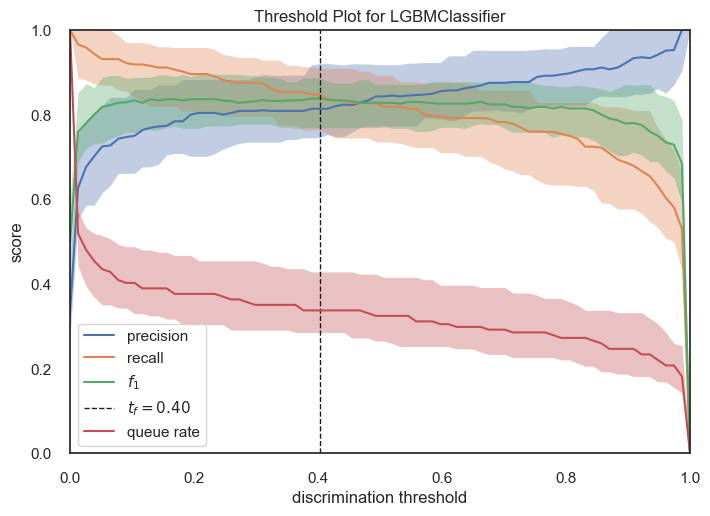

<Axes: title={'center': 'Threshold Plot for LGBMClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [93]:
visualizer = DiscriminationThreshold(lgbm_clf)

visualizer.fit(X, y)  
visualizer.poof() 

We obtain a really good result but we can beat 90% with adding a KNeighborsClassifier to LightGBM (Voting Classifier)

* **KNeighborsClassifier** : KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where  k is an integer value specified by the user.

* **VotingClassifier** : VotingClassifier is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting

With GridSearch CV we search the best "n_neighbors" to optimize accuracy of Voting Classifier

In [94]:
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier(estimators=[ 
    ('lgbm_clf', lgbm_clf),
    ('knn', KNeighborsClassifier())], voting='soft', weights = [1,1])

params = {
      'knn__n_neighbors': np.arange(1,30)
      }
      
grid = GridSearchCV(estimator=voting_clf, param_grid=params, cv=5)

grid.fit(X,y)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

With n_neighbors = 25, the accuracy increase to 89.32%! Bellow the model performance report 

In [95]:
knn_clf = KNeighborsClassifier(n_neighbors = 25)

voting_clf = VotingClassifier (
        estimators = [('knn', knn_clf), ('lgbm', lgbm_clf)],
                     voting='soft', weights = [1,1])

In [96]:
model_performance(voting_clf, 'LightGBM & KNN')
scores_table(voting_clf, 'LightGBM & KNN')

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 207, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337134 -> initscore=-0.676094
[LightGBM] [Info] Start training from score -0.676094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1617
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

## LightGBM & KNN  - Discrimination Threshold

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 244, number of negative: 447
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353111 -> initscore=-0.605390
[LightGBM] [Info] Start training from score -0.605390
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 251, number of negative: 440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 691, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.36324

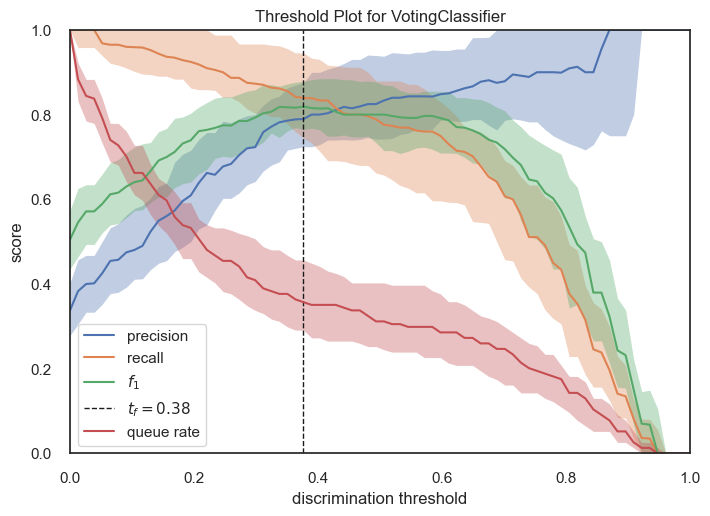

<Axes: title={'center': 'Threshold Plot for VotingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [97]:
visualizer = DiscriminationThreshold(voting_clf)

visualizer.fit(X, y)  
visualizer.poof()  